# Importação de Bibliotecas

As bibliotecas utilizadas incluem NumPy para manipulação de arrays, Matplotlib para visualização, Scikit-learn para o modelo Perceptron e métricas de avaliação, e skimage para o processamento de imagens.

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from skimage import io
import os

# Carregamento e Pré-processamento de Dados

O código realiza o carregamento e pré-processamento das imagens, convertendo-as em arrays unidimensionais.

In [4]:
# Descompactar as imagens
!unzip -q Imagens.zip

# Diretório com as imagens
image_directory = "Imagens"

# Função para carregar e pré-processar imagens
def load_images(directory):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            img_path = os.path.join(directory, filename)
            img = io.imread(img_path, as_gray=True)
            img = img.flatten()  # Transformar em array unidimensional
            images.append(img)
            labels.append(filename)

    return np.array(images), np.array(labels)

# Carregar imagens e rótulos
X, y = load_images(image_directory)

# Divisão em Conjuntos de Treinamento e Teste

Os dados são divididos em conjuntos de treinamento e teste, sendo 80% para treinamento e 20% para teste.

In [92]:
# Dividir dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Antes do treinamento
print("Shape de X_train:", X_train.shape)
print("Shape de y_train:", y_train.shape)
print("Primeras linhas de X_train e y_train:")
print(X_train[:5])
print(y_train[:5])

Shape de X_train: (320, 93600)
Shape de y_train: (320,)
Primeras linhas de X_train e y_train:
[[1.         1.         1.         ... 0.04649333 0.03080706 0.04649333]
 [0.67983804 0.69160275 0.68768118 ... 0.43350667 0.43350667 0.43742824]
 [0.70901529 0.70901529 0.70901529 ... 0.47525373 0.47917529 0.48309686]
 [0.83674549 0.84066706 0.84066706 ... 0.05296039 0.06080353 0.0764898 ]
 [0.73668941 0.73276784 0.72884627 ... 0.52689686 0.52689686 0.51905373]]
['155b.jpg' '136b.jpg' '164b.jpg' '117a.jpg' '182a.jpg']


# Nomalização dos Dados

In [93]:
# Normalização de Dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinamento do Perceptron

Um Perceptron é instanciado e treinado utilizando os conjuntos de treinamento.

In [94]:
# Instanciar o Perceptron com regularização L2 (alpha)
perceptron = Perceptron(max_iter=1000, random_state=42, penalty='l2', alpha=0.001)

# Extrair informações dos rótulos
y_train_binary = np.array([1 if 'a' in label else 0 for label in y_train])
y_test_binary = np.array([1 if 'a' in label else 0 for label in y_test])

# Realizar validação cruzada com acurácia
cv_scores = cross_val_score(perceptron, X_train_scaled, y_train_binary, cv=5, scoring='accuracy')

print("Acurácia em cada fold:", cv_scores)
print("Acurácia média:", np.mean(cv_scores))

Acurácia em cada fold: [0.890625 0.953125 0.890625 0.90625  0.90625 ]
Acurácia média: 0.909375


# Avaliação do Modelo

O modelo é avaliado utilizando métricas como precisão, recall e F1-score, com rótulos binários.

In [95]:
# Treinar o Perceptron
perceptron.fit(X_train_scaled, y_train_binary)

# Prever os rótulos para os dados de teste
y_pred_binary = perceptron.predict(X_test_scaled)

In [96]:
# Calcular métricas de avaliação
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

# Exibir métricas de avaliação
print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Precisão: 0.91
Recall: 0.95
F1-score: 0.93


Matriz de Confusão:
[[32  4]
 [ 2 42]]


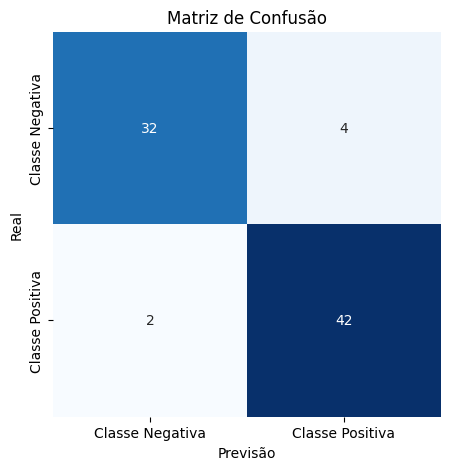

In [97]:
# Matriz de Confusão
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)
print('Matriz de Confusão:')
print(conf_matrix)

# Visualização da Matriz de Confusão
import seaborn as sns
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe Negativa', 'Classe Positiva'],
            yticklabels=['Classe Negativa', 'Classe Positiva'])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Conclusão

O projeto proporcionou uma introdução prática à aplicação de aprendizado de máquina em tarefas de classificação de imagens. As métricas indicam um desempenho consistente e promissor. Futuramente irei explorar abordagens mais avançadas e ajustar hiperparâmetros para aprimorar o modelo em aplicações práticas.

# Interpretação das Métricas

**Precisão (Precision):** A precisão mede a proporção de instâncias positivas que foram corretamente previstas pelo modelo em relação ao total de instâncias positivas previstas. Uma precisão de 0.91 indica que aproximadamente 91% das previsões positivas feitas pelo modelo estão corretas.

**Recall (Sensibilidade):** O recall mede a proporção de instâncias positivas que foram corretamente previstas pelo modelo em relação ao total de instâncias positivas reais. Neste caso, um recall de 0.95 significa que o modelo está identificando corretamente 95% das instâncias positivas reais.

**F1-score:** O F1-score é uma média harmônica entre precisão e recall. Ele fornece uma medida única que equilibra ambas as métricas. Uma pontuação de 0.93 indica um equilíbrio sólido entre precisão e recall.

# Análise da Matriz de Confusão

* **Verdadeiro Positivo (TP):** 42 instâncias foram corretamente classificadas como positivas.
* **Falso Negativo (FN):** 2 instâncias positivas foram erroneamente classificadas como negativas.
* **Falso Positivo (FP):** 4 instâncias negativas foram erroneamente classificadas como positivas.
* **Verdadeiro Negativo (TN):** 32 instâncias foram corretamente classificadas como negativas.

Essa matriz permite uma análise mais granular do desempenho do modelo. Por exemplo, o valor baixo de falsos positivos (FP = 4) é um bom indicativo de que o modelo está rotulando erroneamente pouquíssimas instâncias negativas como positivas. A presença de poucos falsos negativos (FN = 2) sugere que o modelo está identificando corretamente quase todas as instâncias positivas, o que é refletido no recall alto (95%).